,MES_REFERENCIA,GARANTIA_FISICA_SAZONALIZADA,FATOR_PERDAS_INTERNAS,FATOR_PERDAS_REDE_BASICA,FATOR_DISPONIBILIDADE,FATOR_REDUCAO_ACUMULADO,GARANTIA_FISICA_MODULADA_FATOR_DISP,GARANTIA_FISICA_LASTRO_USINA_MRE,GARANTIA_FISICA_LASTRO_USINA_FORA_MRE
0,202501,51410.452428,NaN,NaN,NaN,NaN,NaN,42619.699723,57226.932128
1,202502,54924.606866,NaN,NaN,NaN,NaN,NaN,42385.087246,57331.702391
2,202503,57186.424255,NaN,NaN,NaN,NaN,NaN,41388.472931,56781.489352
3,202504,50552.353433,NaN,NaN,NaN,NaN,NaN,41814.062867,54908.018176
4,202505,45333.524212,NaN,NaN,NaN,NaN,NaN,42388.443204,54837.986054


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MES_REFERENCIA                         12 non-null     int64  
 1   GARANTIA_FISICA_SAZONALIZADA           12 non-null     float64
 2   FATOR_PERDAS_INTERNAS                  0 non-null      float64
 3   FATOR_PERDAS_REDE_BASICA               0 non-null      float64
 4   FATOR_DISPONIBILIDADE                  0 non-null      float64
 5   FATOR_REDUCAO_ACUMULADO                0 non-null      float64
 6   GARANTIA_FISICA_MODULADA_FATOR_DISP    0 non-null      float64
 7   GARANTIA_FISICA_LASTRO_USINA_MRE       12 non-null     float64
 8   GARANTIA_FISICA_LASTRO_USINA_FORA_MRE  12 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 996.0 bytes


,MES_REFERENCIA,GARANTIA_FISICA_SAZONALIZADA,FATOR_PERDAS_INTERNAS,FATOR_PERDAS_REDE_BASICA,FATOR_DISPONIBILIDADE,FATOR_REDUCAO_ACUMULADO,GARANTIA_FISICA_MODULADA_FATOR_DISP,GARANTIA_FISICA_LASTRO_USINA_MRE,GARANTIA_FISICA_LASTRO_USINA_FORA_MRE
0,2025-01-01,51410.452428,NaN,NaN,NaN,NaN,NaN,42619.699723,57226.932128
1,2025-02-01,54924.606866,NaN,NaN,NaN,NaN,NaN,42385.087246,57331.702391
2,2025-03-01,57186.424255,NaN,NaN,NaN,NaN,NaN,41388.472931,56781.489352
3,2025-04-01,50552.353433,NaN,NaN,NaN,NaN,NaN,41814.062867,54908.018176
4,2025-05-01,45333.524212,NaN,NaN,NaN,NaN,NaN,42388.443204,54837.986054


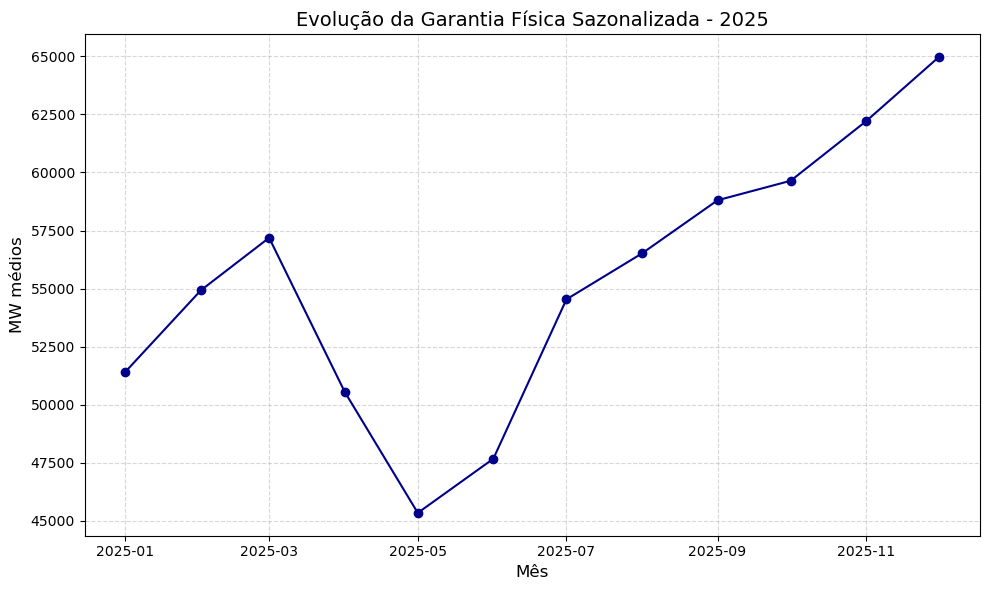

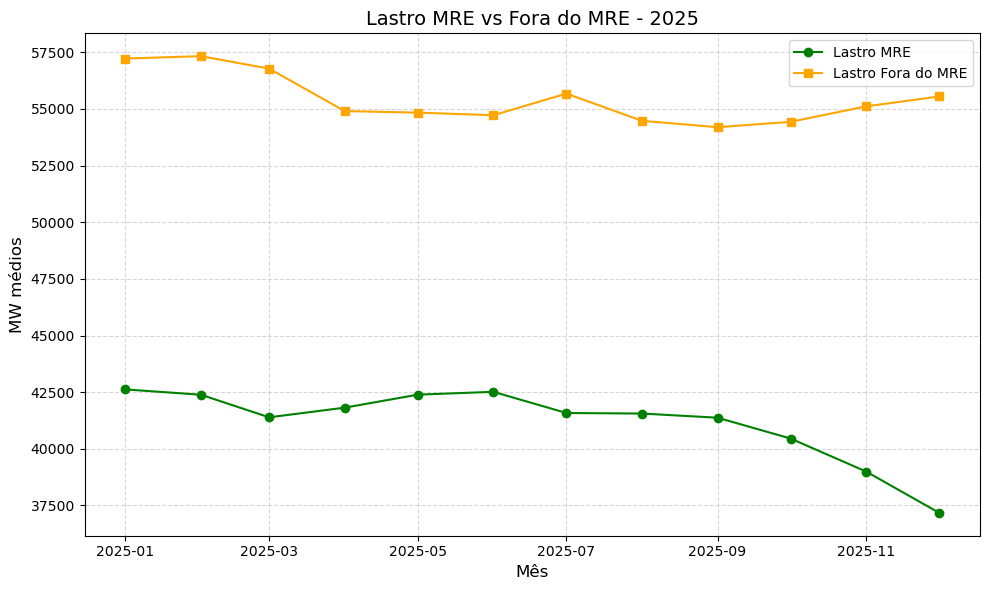

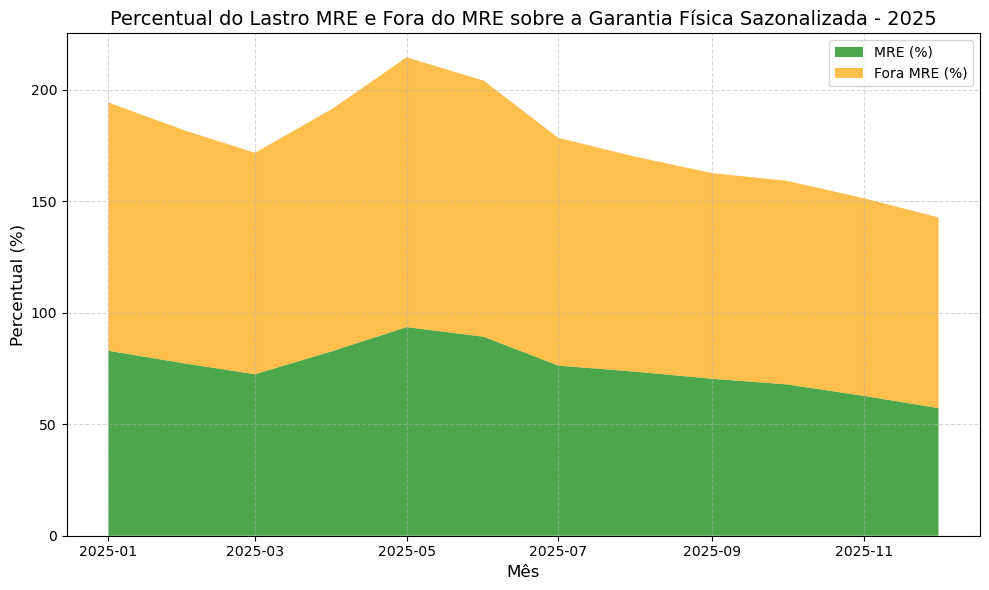

✅ Análise finalizada e gráficos gerados com sucesso em: F:\10 - Projetos\14 - Analises de Dados\01 - Setor eletrico\analise_sazonalizacao_fator_ajuste_2025\imagens


In [4]:
# %% 📦 Importações
import pandas as pd
import matplotlib.pyplot as plt
import os

# %% 📂 Caminhos
caminho_csv = r'F:\10 - Projetos\14 - Analises de Dados\01 - Setor eletrico\analise_sazonalizacao_fator_ajuste_2025\dados\sazonalizacao_mre_gf_fator_ajuste_2025.csv'
caminho_imagens = r'F:\10 - Projetos\14 - Analises de Dados\01 - Setor eletrico\analise_sazonalizacao_fator_ajuste_2025\imagens'


# %% 🛠️ Criar pasta imagens se não existir
if not os.path.exists(caminho_imagens):
    os.makedirs(caminho_imagens)

# %% 📥 Leitura dos dados
df = pd.read_csv(caminho_csv, delimiter=';', encoding='utf-8')

# %% 🩺 Visualização inicial
display(df.head())
df.info()

# %% 🗓️ Conversão da coluna MES_REFERENCIA para datetime
df['MES_REFERENCIA'] = pd.to_datetime(df['MES_REFERENCIA'].astype(str), format='%Y%m')

display(df.head())

# %% 📈 Gráfico 1: Evolução da Garantia Física Sazonalizada
plt.figure(figsize=(10, 6))
plt.plot(df['MES_REFERENCIA'], df['GARANTIA_FISICA_SAZONALIZADA'], marker='o', color='darkblue')
plt.title('Evolução da Garantia Física Sazonalizada - 2025', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('MW médios', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(caminho_imagens + 'evolucao_gf_sazonalizada.png', dpi=300)
plt.show()

# %% 📈 Gráfico 2: Lastro MRE vs Fora do MRE
plt.figure(figsize=(10, 6))
plt.plot(df['MES_REFERENCIA'], df['GARANTIA_FISICA_LASTRO_USINA_MRE'], label='Lastro MRE', marker='o', color='green')
plt.plot(df['MES_REFERENCIA'], df['GARANTIA_FISICA_LASTRO_USINA_FORA_MRE'], label='Lastro Fora do MRE', marker='s', color='orange')
plt.title('Lastro MRE vs Fora do MRE - 2025', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('MW médios', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(caminho_imagens + 'lastro_mre_vs_fora_mre.png', dpi=300)
plt.show()

# %% 📈 Gráfico 3: Percentual MRE e Fora do MRE sobre Sazonalizada
df['perc_mre'] = (df['GARANTIA_FISICA_LASTRO_USINA_MRE'] / df['GARANTIA_FISICA_SAZONALIZADA']) * 100
df['perc_fora_mre'] = (df['GARANTIA_FISICA_LASTRO_USINA_FORA_MRE'] / df['GARANTIA_FISICA_SAZONALIZADA']) * 100

plt.figure(figsize=(10, 6))
plt.stackplot(df['MES_REFERENCIA'], df['perc_mre'], df['perc_fora_mre'],
              labels=['MRE (%)', 'Fora MRE (%)'],
              colors=['green', 'orange'],
              alpha=0.7)
plt.title('Percentual do Lastro MRE e Fora do MRE sobre a Garantia Física Sazonalizada - 2025', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(caminho_imagens + 'percentual_mre_vs_fora_mre.png', dpi=300)
plt.show()

print('✅ Análise finalizada e gráficos gerados com sucesso em:', caminho_imagens)
